In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [4]:
taxi = pd.read_csv('https://stepik.org/media/attachments/lesson/359240/taxi_peru.csv', sep=';', parse_dates = ['start_at', 'end_at', 'arrived_at'])
taxi

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,2010-07-31 13:15:00,"-12,08974075","-77,04699707",2010-07-31 13:27:00,"-12,08352661","-77,05044556",drop off,"-12,08973527","-77,04787016",2010-07-31 13:15:00,iPhone,5.0,5.0
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-10-02 05:26:00,"-12,09253011","-77,02875271",2010-10-02 05:56:00,"-12,07776001","-77,05623798",drop off,"-12,10639693","-77,04028948",2010-10-02 05:39:00,Android,NaN,5.0
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,asap,2010-09-21 09:56:00,"-12,1275637","-77,02642288",2010-09-21 10:18:00,"-12,10529838","-77,04735249",drop off,"-12,12605017","-77,01882491",2010-09-21 10:05:00,Android,0.0,0.0
23109,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,reserved,2010-04-29 04:30:00,"-12,019468","-77,1077669",2010-04-29 05:11:00,"-12,09909987","-77,03475013",drop off,"-12,0710933","-77,09855131",2010-04-29 04:23:00,Android,NaN,5.0


In [5]:
taxi.columns

Index(['journey_id', 'user_id', 'driver_id', 'taxi_id', 'icon', 'start_type',
       'start_at', 'start_lat', 'start_lon', 'end_at', 'end_lat', 'end_lon',
       'end_state', 'driver_start_lat', 'driver_start_lon', 'arrived_at',
       'source', 'driver_score', 'rider_score'],
      dtype='object')

In [ ]:
round(taxi.groupby('source')['journey_id'].count()/taxi['journey_id'].count()*100, 0)

source
Android    21.0
Wap         1.0
iPad        2.0
iPhone     42.0
web        33.0
Name: journey_id, dtype: float64

In [ ]:
bar_data = taxi.groupby('source') \
               .agg({'journey_id': 'count'}) \
               .reset_index(names='source') \
               .rename(columns={'journey_id': 'count'}) \
               .sort_values(by='count', ascending=False)
bar_data

,source,count
3,iPhone,9741
4,web,7631
0,Android,4909
2,iPad,571
1,Wap,136


<Axes: xlabel='source', ylabel='count'>

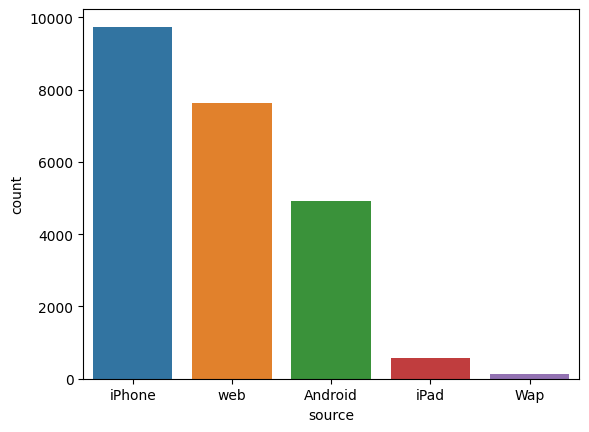

In [ ]:
sns.barplot(x='source', y='count', data = bar_data)

<Axes: xlabel='source', ylabel='count'>

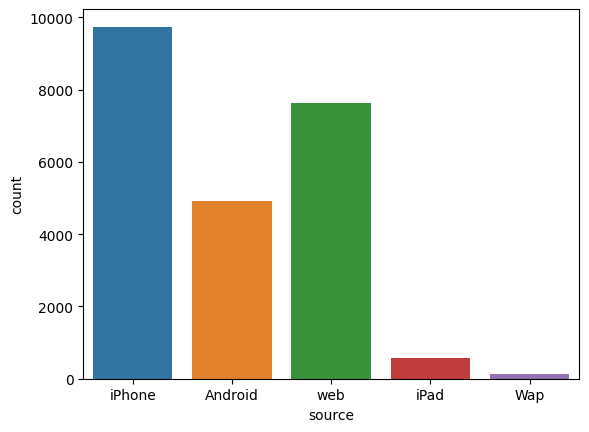

In [ ]:
sns.countplot(taxi, x='source')

<Axes: xlabel='icon', ylabel='count'>

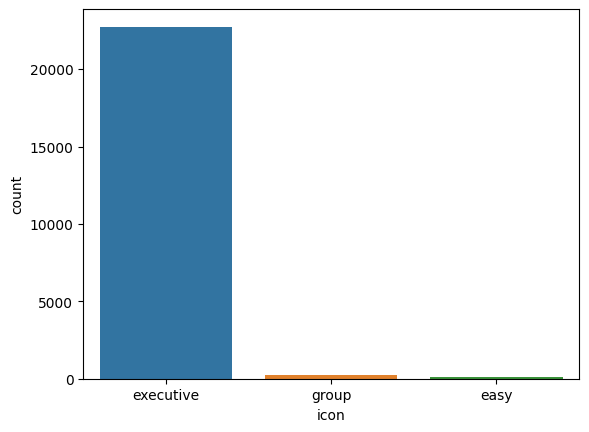

In [ ]:
sns.countplot(taxi, x='icon')

<Axes: xlabel='end_state', ylabel='count'>

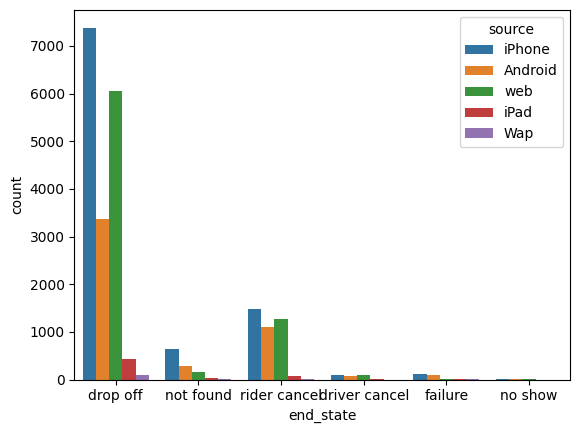

In [ ]:
sns.countplot(taxi, x='end_state', hue = 'source')

<Axes: xlabel='driver_score', ylabel='count'>

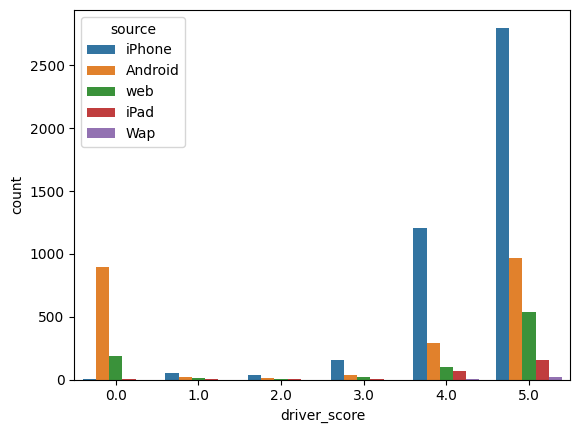

In [6]:
sns.countplot(taxi, x='driver_score', hue = 'source')

In [21]:
taxi.groupby('driver_score') \
               .agg({'journey_id': 'count'}) \
               .reset_index(names='driver_score') \
               .rename(columns={'journey_id': 'count'}) \
               .sort_values(by='count', ascending=False)

,driver_score,count
5,5.0,4499
4,4.0,1674
0,0.0,1094
3,3.0,227
1,1.0,94
2,2.0,62


Проверим, как распределены оценки водителей (driver_score). Для подготовки данных выполните следующие шаги:

    Посчитайте частоту встречаемости каждой из оценок
    Переведите в проценты и округлите до 2 знаков после точки (.mul(100).round(2))
    Сбросьте индексы
    Переименуйте колонки в driver_score и percentage
    Отсортируйте по driver_score в порядке возрастания (от 0 до 5)
    Запишите результат в driver_score_counts

Полезные функции:

    .mul() – умножение, более удобный вариант для использования в цепочке методов 
    .round() – округление
    .reset_index() – сбросить индекс
    .value_counts() – сколько раз встречается каждое значение переменной


In [31]:
driver_score_counts = taxi.driver_score.value_counts(normalize = True).mul(100).round(2) \
                       .reset_index() \
                       .rename(columns={'index': 'driver_score', 'driver_score': 'percentage'}) \
                       .sort_values(by='driver_score', ascending=True)
driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


In [34]:
driver_score_counts.columns

Index(['driver_score', 'percentage'], dtype='object')

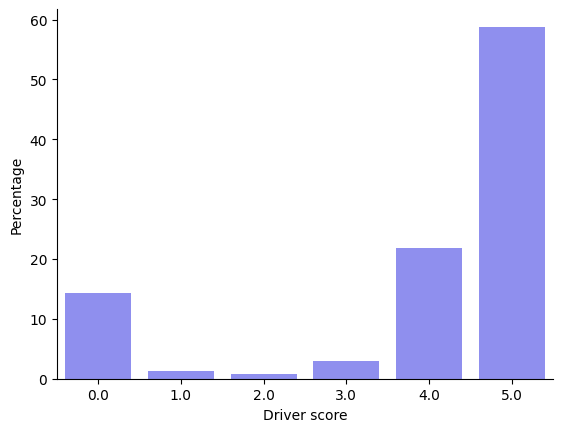

In [38]:
ax = sns.barplot( data = driver_score_counts, x= 'driver_score', y='percentage', color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

Проделайте аналогичные шаги для rider_score (оценок клиентов водителями), не забыв построить график. В чем его отличие от распределения оценок водителей?

In [41]:
rider_score_counts = taxi.rider_score.value_counts(normalize = True).mul(100).round(2) \
                       .reset_index() \
                       .rename(columns={'index': 'rider_score', 'rider_score': 'percentage'}) \
                       .sort_values(by='rider_score', ascending=True)
rider_score_counts

,rider_score,percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


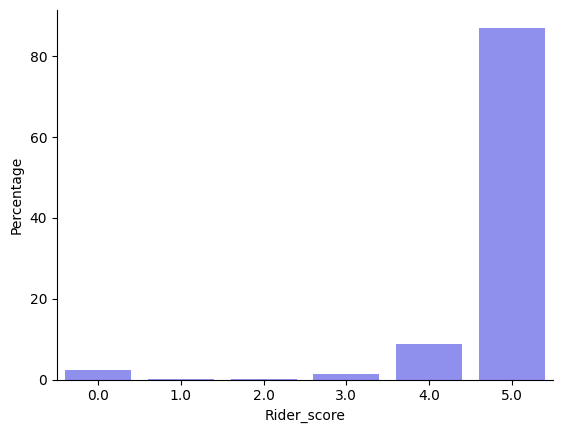

In [42]:
ax = sns.barplot( data = rider_score_counts, x= 'rider_score', y='percentage', color='blue', alpha=0.5)
ax.set(xlabel='Rider_score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()